## Historic Data, Modern Models: California Housing Prices
author: R.H. Amezqueta <br>
date: 12-15-2024

This project is part of my data science portfolio. Check out the full summary, designed to be presented to non-technical teams:
https://rhamezqueta.wixsite.com/portfolio/portfolio-1

**Overview:**<br>
This project focuses on developing and optimizing machine learning models to predict median housing prices in California, leveraging a dataset with features such as geographical location, population density, housing characteristics, and socioeconomic factors. The ultimate goal is to create an accurate and interpretable model that provides actionable insights into the drivers of housing prices while analyzing their economic implications.

**Disclaimer on Use of Data:**<br>
The dataset incorporated into this portfolio is used solely for demonstrative and educational purposes. My intention in presenting this portfolio is to showcase my skills and abilities. At no point do I claim ownership over the original data or seek to derive commercial revenue from its use

**Introduction:**<br>
The dataset was extracted from the 1990 California census and includes information about houses within various districts, along with summary statistics for each district. Despite being based on 1990s data, the application of machine learning models to this dataset provides valuable insights and practical utilities in modern contexts. These models capture long-term patterns and relationships, such as the influence of income, proximity to the coast, and population density on housing prices, which remain relevant today. They can serve as a baseline for updating with modern data, help test housing market assumptions, simulate economic scenarios, and educate analysts and policymakers on housing market dynamics. While absolute price predictions need adjustment for inflation and contemporary factors, the insights into variable interactions are still applicable for regional comparisons, retrospective analyses, and understanding market trends. Additionally, the utility of these models will be enhanced by testing both manual models and AutoML approaches, ensuring a comprehensive evaluation of model performance and ease of use in various applications.

**Methodology**<br>
* Exploratory Data Analysis (EDA):
  - Conducted an initial analysis to understand the dataset's structure and key characteristics.
  - Visualized California districts on a map and created a heatmap to display median house prices.
* Algorithm Testing:
  - Tested multiple algorithms to evaluate how the dataset behaved.
  - Selected the most promising algorithms for further optimization.
* Baseline Model Creation:
  - Used H2O AutoML to develop baseline models with the dataset in its original form.
* Feature Engineering:
  - Created new features by combining existing ones to enhance predictive power.
* Model Optimization:
  - Conducted parameter search and tuning for selected algorithms, incorporating engineered features.
  - Extracted the most relevant features for final model improvement.
* Performance Comparison:
  - Compared results across all models to identify the best-performing approach.tegy.

**Data Limitations:** <br>
This analysis faces several limitations that could impact the accuracy and generalizability of the models. The dataset lacks important variables that significantly influence housing prices, such as proximity to amenities, specific property features, or broader economic indicators like interest rates and unemployment rates. These omissions limit the models’ ability to capture the full complexity of housing price determinants. As mentioned before, its basis on 1990 census data makes the models less relevant for modern markets unless updated. Additionally, the capped data at $500,001 also poses challenges, as models may still struggle to represent high-value properties accurately despite engineering adjustments.

In [2]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
import warnings

In [25]:
# Loading data 
house_data = pd.read_csv('Data/housing.csv')

In [26]:
# Ignore warnings
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis (EDA)**

In [27]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [28]:
# Dimension 
dim = house_data.shape
dim

(20640, 10)

In [29]:
# Variables 
var_list = list(house_data)
var_list

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [30]:
# Description of variables 
basic_st = house_data.describe()
basic_st

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


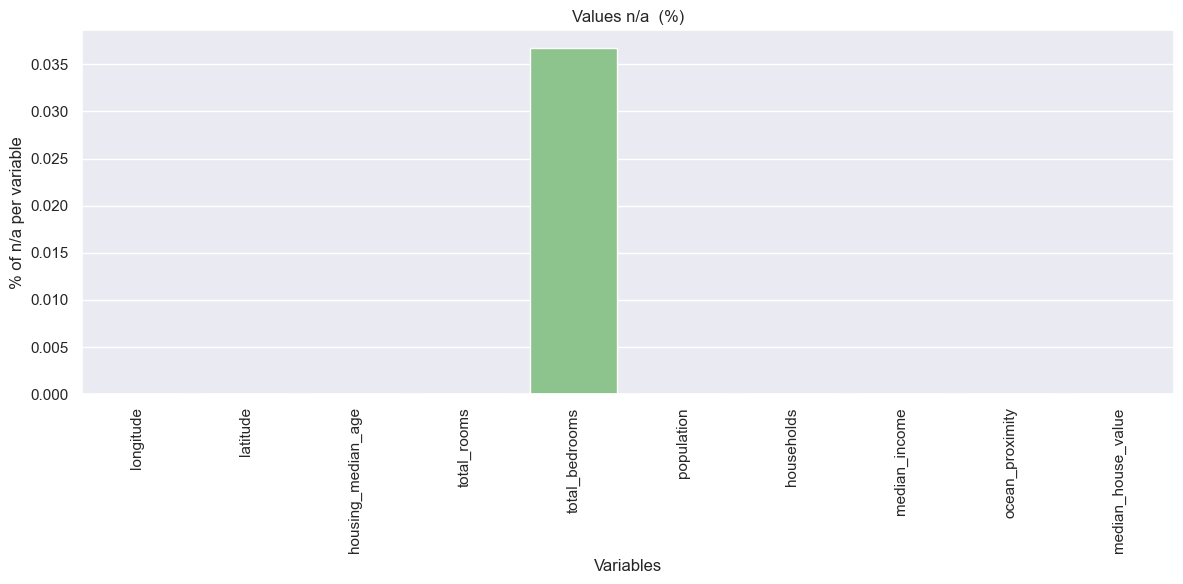

** Total n/a variables **
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [31]:
# Nulls and n/a 
n_a = house_data.isna().sum()

# Seaborn style
sns.set(style="darkgrid")

# Barplot representing the n/a values (%)
plt.figure(figsize=(12, 6))
sns.barplot(x=n_a.index, y=n_a/5630, palette="Greens")
plt.title('Values n/a  (%)')
plt.xlabel('Variables')
plt.ylabel('% of n/a per variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Numeric values
print("** Total n/a variables **")
print(n_a)

The variable total_rooms contains some missing values (0.035%). This percentage is truly negligible and deleting the rows with missing values seems reasonable.  Anyways, I aim to evaluate its relationship with the target variable, median_house_value. This analysis will help me determine whether the missing data could impact in somehow the model's performance.

In [32]:
# Data types
house_data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

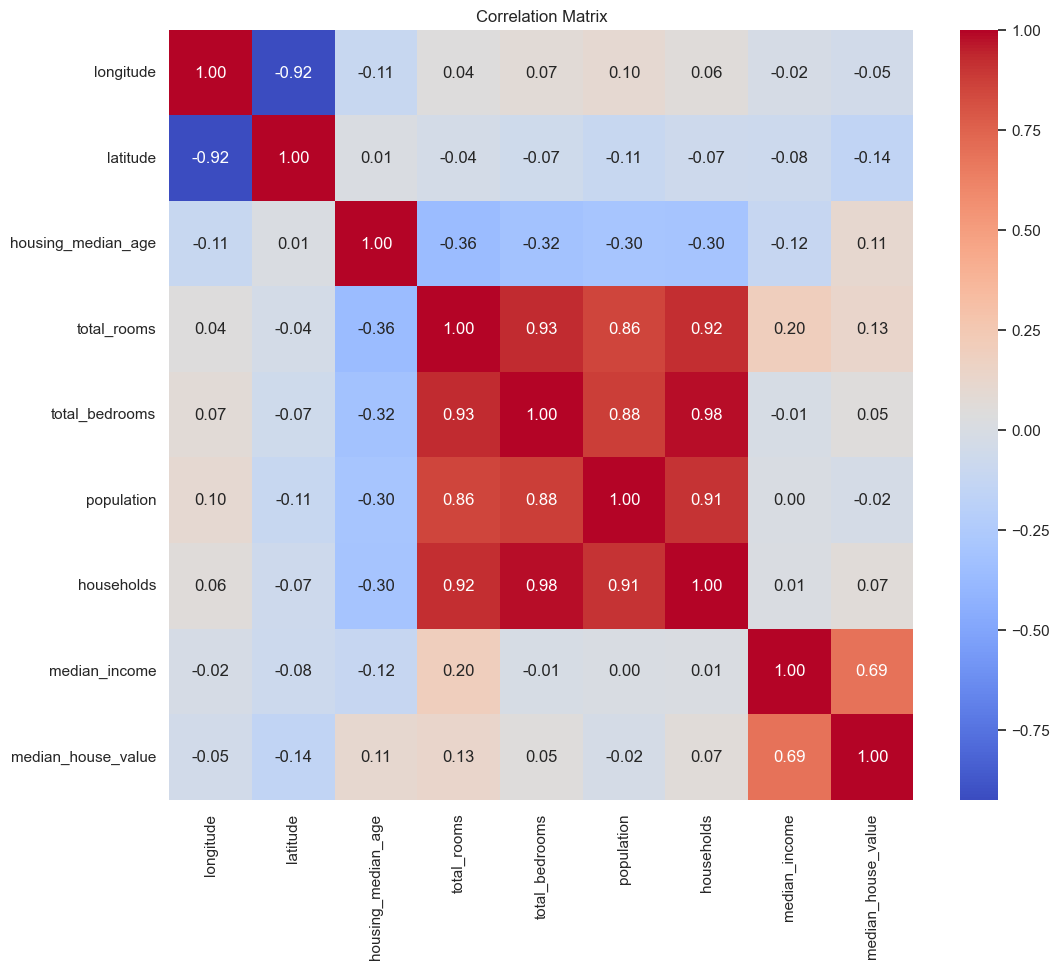

In [33]:
# Correlation Matrix and Heatmap
matrix_cor = house_data.select_dtypes(include=['int64', 'float64']).corr()
matrix_cor

# Fig size 
plt.figure(figsize=(12, 10))

# Creates a heatmap from the correlation matrix 
sns.heatmap(matrix_cor, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title('Correlation Matrix')

# Shows the heatmap
plt.show()

Since total_rooms a has weak correlation with the target, deleting the rows with the missin values is likely fine.

**Heatmap Analysis:** 
* The high correlations among total_rooms, total_bedrooms, population, and households suggest potential for creating derived features  to capture relationships that are more directly relevant to the target variable.
* Longitude and latitude are negatively correlated with each other (-0.92), reflecting their geographic relationship in California, where longitude decreases as latitude increases.
* The weak and inverse correlations of latitude and longitude with the target indicate that geographical location might influence housing prices, but their predictive power may improve when combined into a single feature, such as "distance to the ocean" or "proximity to urban centers.


In [34]:
# Saving the original DF to a new variable
house_data_full = house_data

# DF clean 
house_data = house_data_full.dropna()

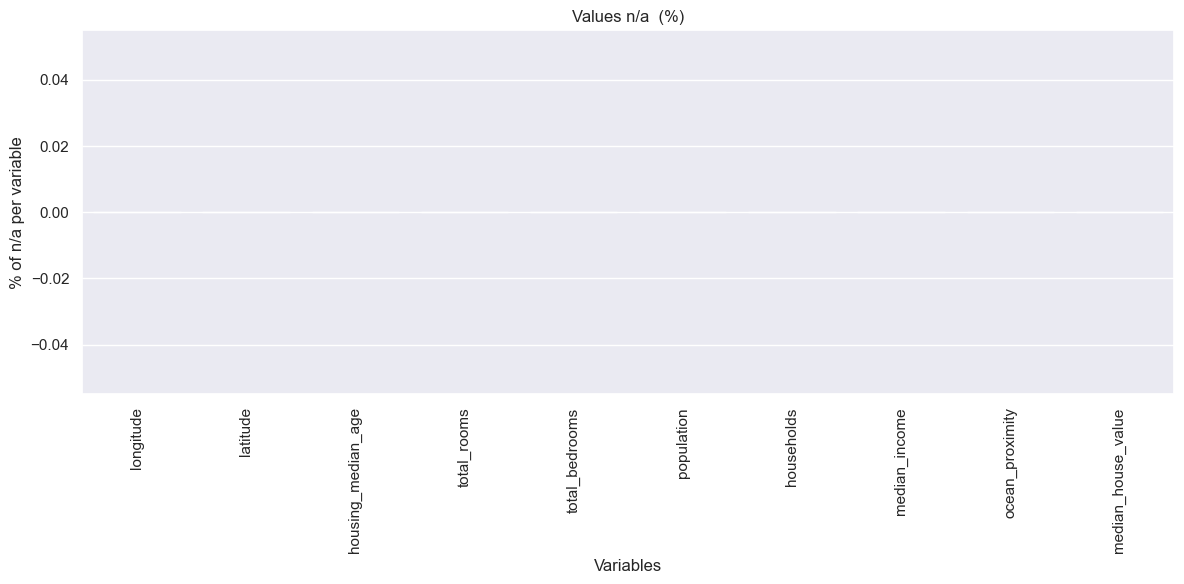

** Total n/a variables **
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [35]:
# Checking changes
# Nulls and n/a 
n_a = house_data.isna().sum()

# Seaborn style
sns.set(style="darkgrid")

# Barplot representing the n/a values (%)
plt.figure(figsize=(12, 6))
sns.barplot(x=n_a.index, y=n_a/5630, palette="Greens")
plt.title('Values n/a  (%)')
plt.xlabel('Variables')
plt.ylabel('% of n/a per variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Numeric values
print("** Total n/a variables **")
print(n_a)

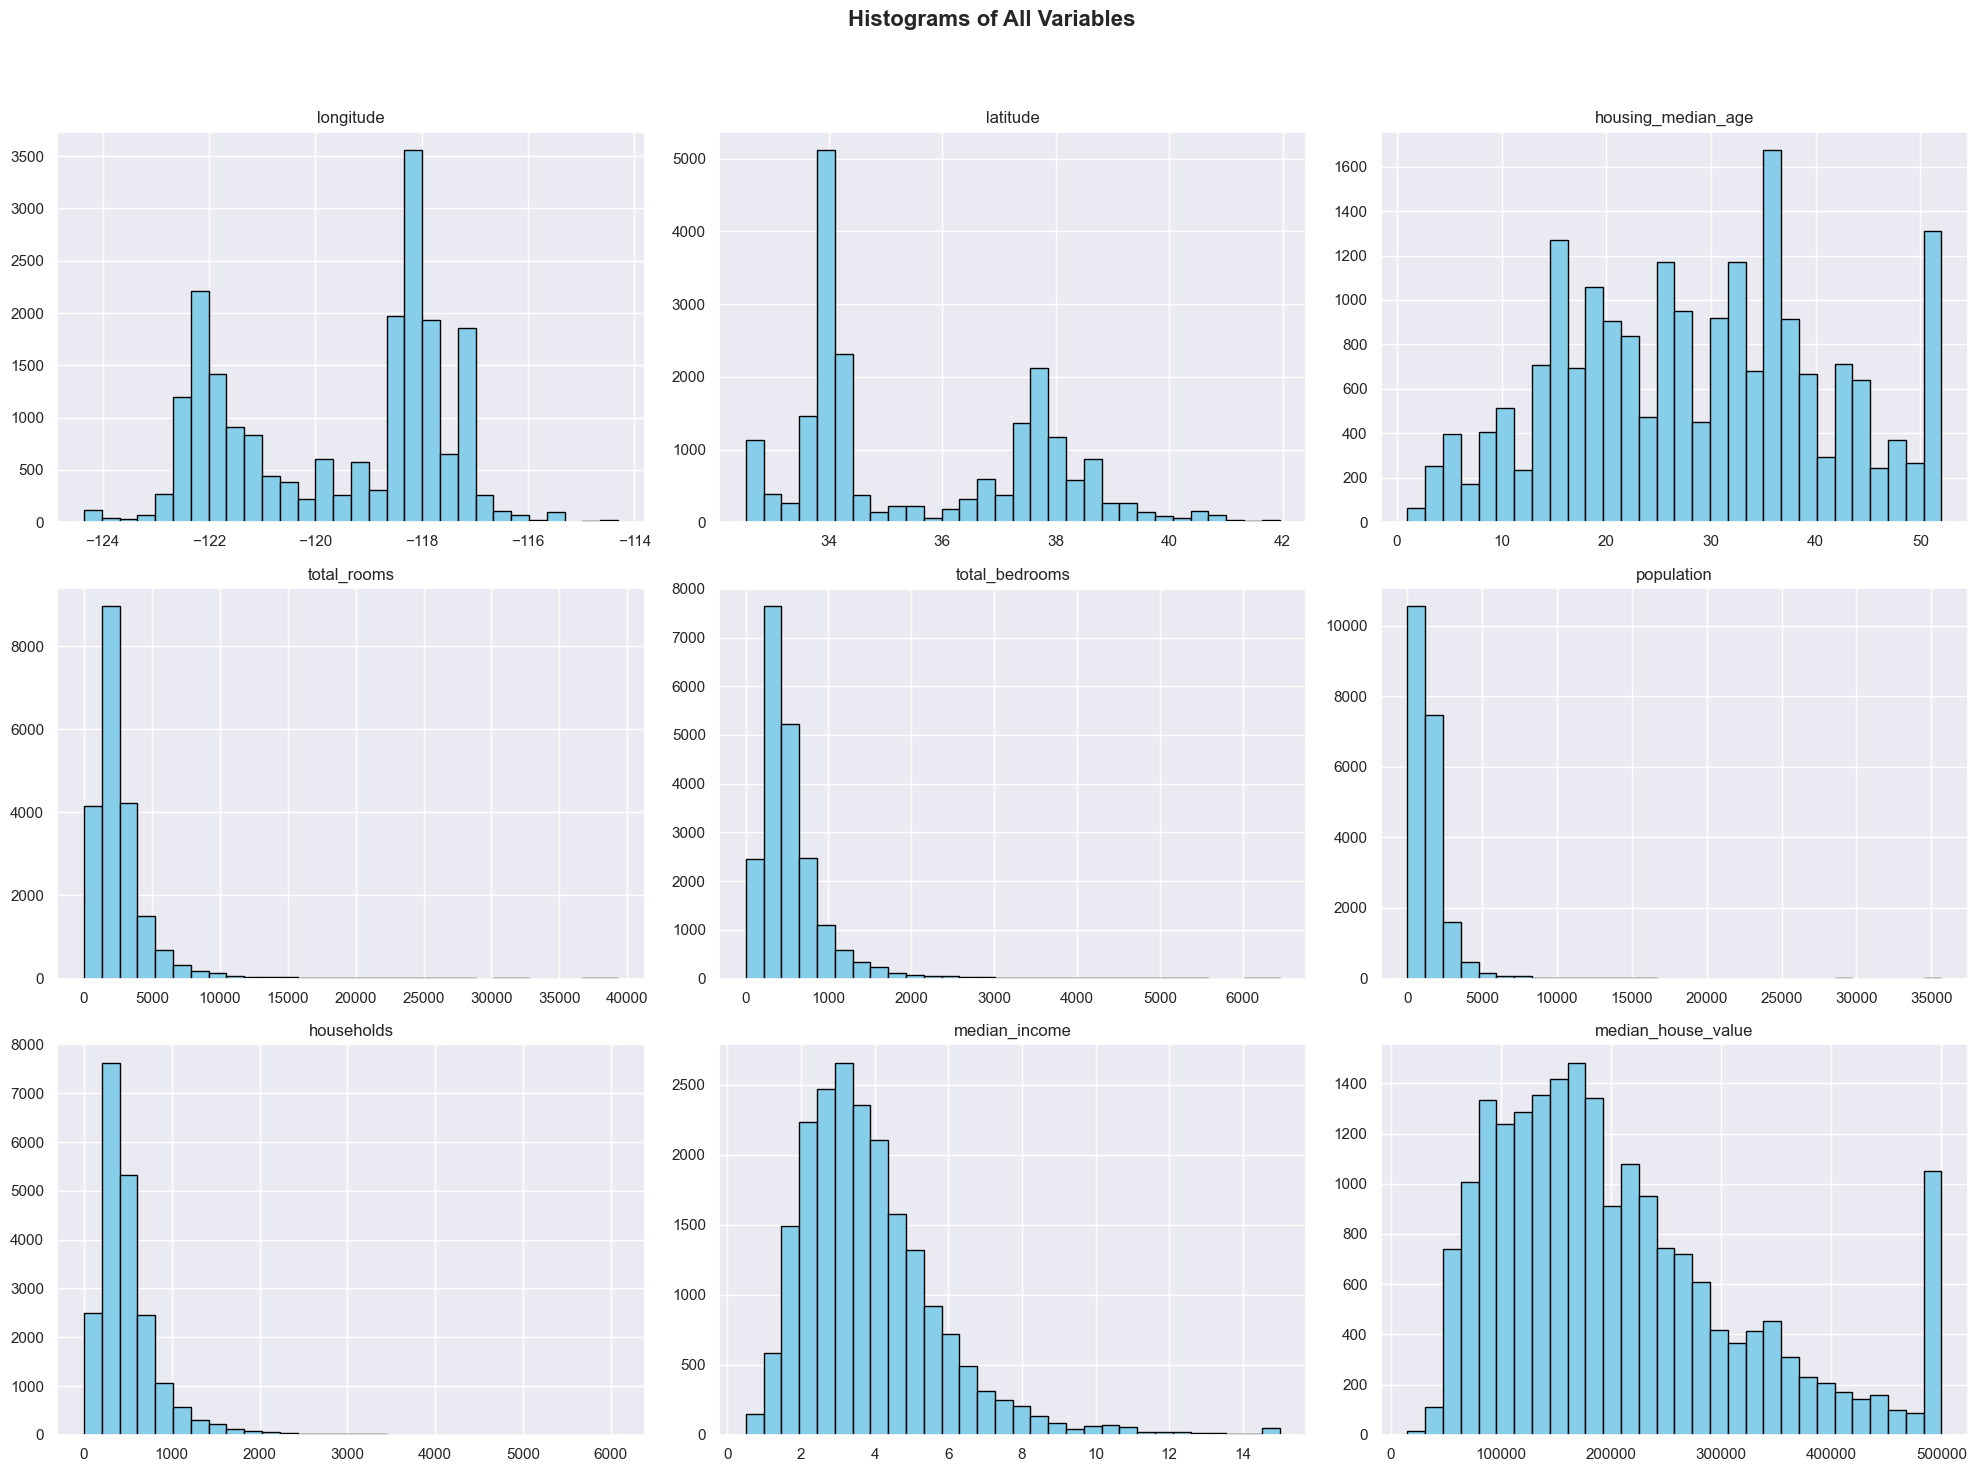

In [36]:
# Histograms for all variables in the dataset
house_data.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')

# Title for the entire figure
plt.suptitle('Histograms of All Variables', fontsize=16, fontweight='bold')

# Showing the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Layout to fit the title
plt.show()

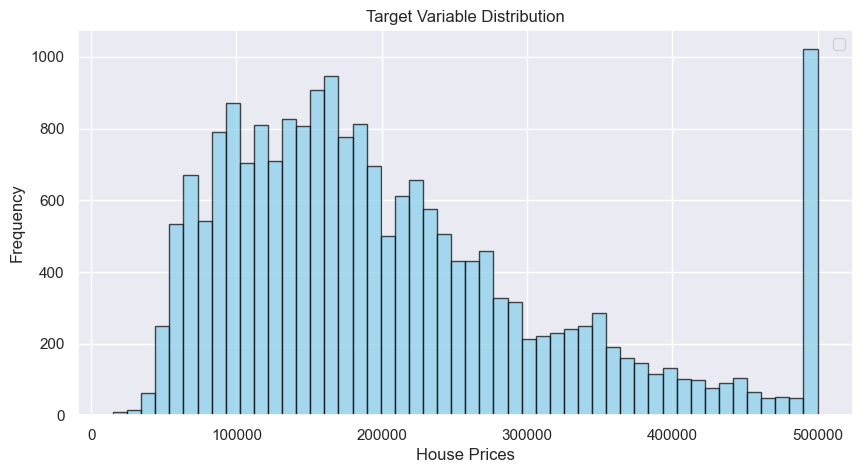

In [37]:
# Plotting the target variable
plt.figure(figsize=(10, 5))
plt.hist(house_data['median_house_value'], bins=50, alpha=0.7,edgecolor='black', color='skyblue')
plt.title('Target Variable Distribution')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Most house prices seem concentrated between $100,000 and $300,000, with a sharp increase near $500,000. The long tail on the right indicates the presence of extremely high house prices. The spike at $500,000 suggests that the data might be capped or truncated at this value. This is common in datasets that have imposed upper bounds such as maximun recordable values. 

In [38]:
# Capped data exploration 
capped_data = house_data[house_data['median_house_value'] > 500000]
non_capped_data = house_data[house_data['median_house_value'] <= 500000]

In [39]:
# summary statistics for capped values 
print("Summary statistics for capped values:")
print(capped_data.describe())


Summary statistics for capped values:
        longitude    latitude  housing_median_age   total_rooms  \
count  958.000000  958.000000          958.000000    958.000000   
mean  -119.700438   35.223591           33.817328   2962.031315   
std      1.945127    1.783203           13.020803   2167.619458   
min   -122.640000   32.680000            2.000000      8.000000   
25%   -122.117500   33.972500           24.250000   1668.500000   
50%   -118.480000   34.125000           34.000000   2514.500000   
75%   -118.330000   37.397500           44.000000   3539.750000   
max   -116.430000   38.910000           52.000000  18132.000000   

       total_bedrooms   population   households  median_income  \
count      958.000000   958.000000   958.000000     958.000000   
mean       501.782881  1113.026096   465.686848       7.823533   
std        398.408898   815.263027   361.908488       3.240095   
min          1.000000    13.000000     1.000000       0.499900   
25%        266.000000   637.

In [40]:
# summary statistics for non-capped values
print("Summary statistics for non-capped values:")
print(non_capped_data.describe())

Summary statistics for non-capped values:
          longitude      latitude  housing_median_age   total_rooms  \
count  19475.000000  19475.000000        19475.000000  19475.000000   
mean    -119.564306     35.653372           28.378074   2620.491142   
std        2.006241      2.150250           12.515373   2184.938093   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.930000           18.000000   1441.000000   
50%     -118.500000     34.270000           28.000000   2111.000000   
75%     -117.990000     37.730000           37.000000   3118.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    19475.000000  19475.000000  19475.000000   19475.000000   
mean       539.645751   1440.290732    501.093504       3.676739   
std        422.413200   1144.399323    383.206416       1.569263   
min          2.000000      3.000000      2.000

In [41]:
#Capped count
capped_count = (house_data['median_house_value'] > 500000).sum()
total_count = len(house_data['median_house_value'])

print(f"Number of capped values: {capped_count}")
print(f"Percentage of capped values: {capped_count / total_count * 100:.2f}%")

Number of capped values: 958
Percentage of capped values: 4.69%


The capped values could have a noticeable impact on the models, especially if these represent high-value houses with unique characteristics. It may affect the model's ability to accurately learn the relationship between features and high house prices.

# **Districts Analyzed**

In [42]:
# Map creation with Latitude and Longitude 
map_data = house_data[['longitude', 'latitude','median_house_value']]

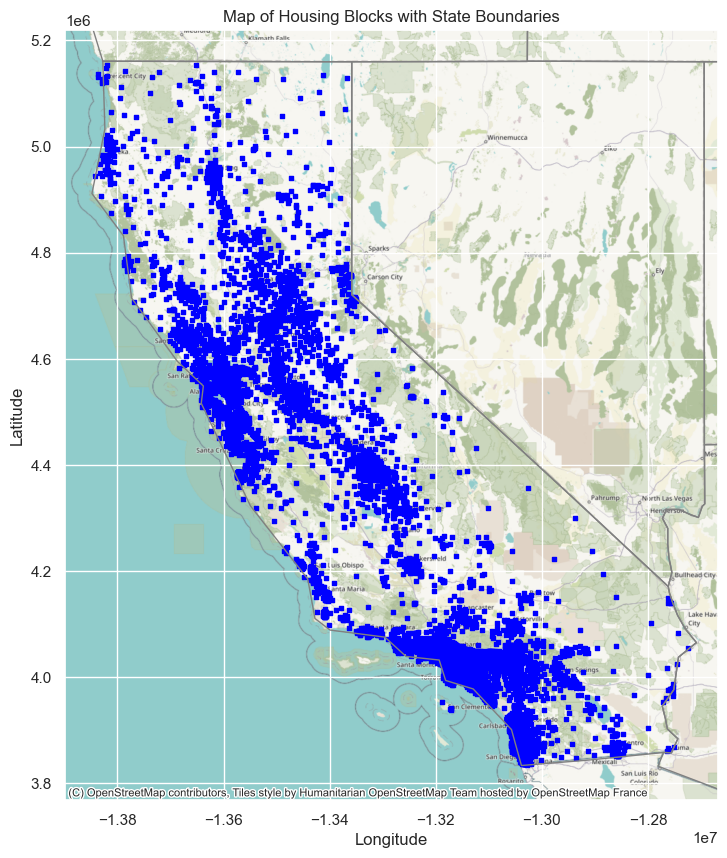

In [43]:
# Geometry column using the Point function from Shapely
geometry = [Point(xy) for xy in zip(map_data['longitude'], map_data['latitude'])]

# GeoDataFrame
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

# Setting the coordinate reference system (CRS) to WGS84 (latitude/longitude)
gdf.crs = "EPSG:4326"

# Reprojecting to the CRS of the basemap (Web Mercator, EPSG:3857)
gdf = gdf.to_crs(epsg=3857)

# Loading the US States shapefile from Natural Earth
states = gpd.read_file("states_and_territories/ne_110m_admin_1_states_provinces.shp")

# Filtering for the United States 
us_states = states[states['admin'] == 'United States of America']

# Reprojecting the states GeoDataFrame to match the CRS of the map (EPSG:3857)
us_states = us_states.to_crs(epsg=3857)

# Plotting the GeoDataFrame (housing blocks)
ax = gdf.plot(marker='s', color='blue', markersize=5, figsize=(10, 10))

# Adding the basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Plotting the state boundaries
us_states.boundary.plot(ax=ax, linewidth=1, color='gray')  

# Adding titles, labels, and adjusts plot settings
plt.title('Map of Housing Blocks with State Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

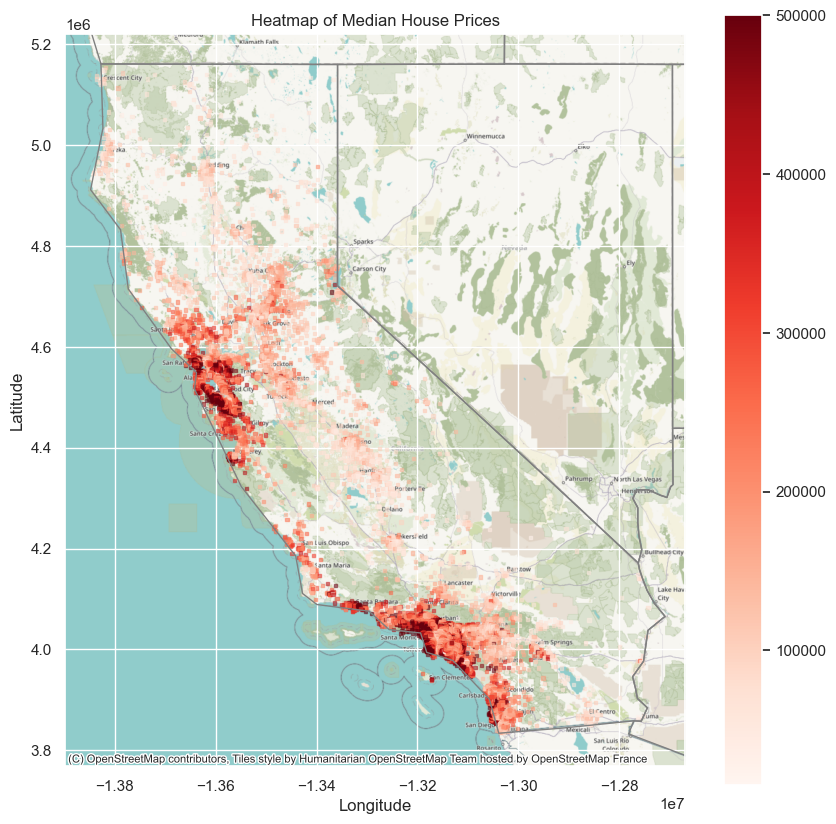

In [44]:

# Heatmap using scatter plot with color intensity 
fig, ax = plt.subplots(figsize=(10, 10))

# Plots the prices as a heatmap (scatter with alpha for intensity)
gdf.plot(ax=ax,
         column='median_house_value',  
         cmap='Reds',              # Heatmap color scheme
         markersize=5,               # Adjust the marker size
         legend=True,                
         alpha=0.5,
         marker = 's')                  


# Adding the basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Plotting the state boundaries
us_states.boundary.plot(ax=ax, linewidth=1, color='gray')

# Adding titles, labels, and adjust plot settings
plt.title('Heatmap of Median House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Map Description:**<br>
- The areas along the coast, particularly around major urban centers such as Los Angeles, San Francisco, and San Diego, show higher median house prices, reflected by the denser and darker red regions.
- The heatmap also reflects the capped value for luxury housing prices at 500,001USD. This cap might underestimate the true extent of housing value concentration in high-demand areas, particularly in affluent coastal neighborhoods.
- As we move inland, away from the coastal regions, house prices tend to decrease. These regions are lighter on the heatmap, indicating more affordable housing compared to the high-demand urban centers.
- The heatmap shows a skewed distribution of house prices, with significant clustering of higher values near economic and geographic hubs, while the interior regions show more moderate to lower house prices.

# **Algorithm Testing**


This time, my approach will involve testing multiple algorithms to assess the dataset's behavior and selecting the three most promising ones for further optimization.


In [45]:
# Preprocessing
X = house_data.drop(["median_house_value"], axis=1)
y = house_data["median_house_value"]

# Seed
seed = 42

In [46]:
# Dummies for the categorical variable 
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)

In [47]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)



In [48]:
# Models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=seed),
    "Gradient Boosting": GradientBoostingRegressor(random_state=seed),
    "XGBoost": xgb.XGBRegressor(random_state=seed),
    "LightGBM": lgb.LGBMRegressor(random_state=seed),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf')
}

In [49]:
# Defining custom scoring for RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Evaluating each model
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # Standardize features for certain models
        ("model", model)
    ])
    
    # Calculate MAE
    mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
    mae_mean = -np.mean(mae_scores)
    mae_std = np.std(mae_scores)
    
    # Calculate RMSE
    rmse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=rmse_scorer)
    rmse_mean = -np.mean(rmse_scores)
    rmse_std = np.std(rmse_scores)
    
    results.append({
        "Model": name,
        "MAE (Mean Absolute Error)": mae_mean,
        "MAE Std Dev": mae_std,
        "RMSE (Root Mean Squared Error)": rmse_mean,
        "RMSE Std Dev": rmse_std
    })

# Converting results to DataFrame for easy comparison
results_df = pd.DataFrame(results).sort_values(by="MAE (Mean Absolute Error)")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1847
[LightGBM] [Info] Number of data points in the train set: 13076, number of used features: 11
[LightGBM] [Info] Start training from score 207551.346819
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 13077, number of used features: 11
[LightGBM] [Info] Start training from score 206676.334863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

In [50]:
# Display results
print(results_df)

               Model  MAE (Mean Absolute Error)  MAE Std Dev  \
6            XGBoost               31525.211847   947.261193   
7           LightGBM               31716.945301   877.225819   
4      Random Forest               32052.088093  1052.847080   
5  Gradient Boosting               38387.196867   916.449613   
8                KNN               41265.366035  1057.049755   
3      Decision Tree               44174.342268  1254.252293   
1   Ridge Regression               49660.008839  1084.269277   
2   Lasso Regression               49661.032263  1084.776122   
0  Linear Regression               49661.046739  1084.787751   
9                SVR               87634.146889  1606.220202   

   RMSE (Root Mean Squared Error)  RMSE Std Dev  
6                    47498.938643   1705.098642  
7                    47337.938083   1655.370591  
4                    49299.191970   1954.281204  
5                    55161.260318   1642.570509  
8                    61149.047912   2184.2685

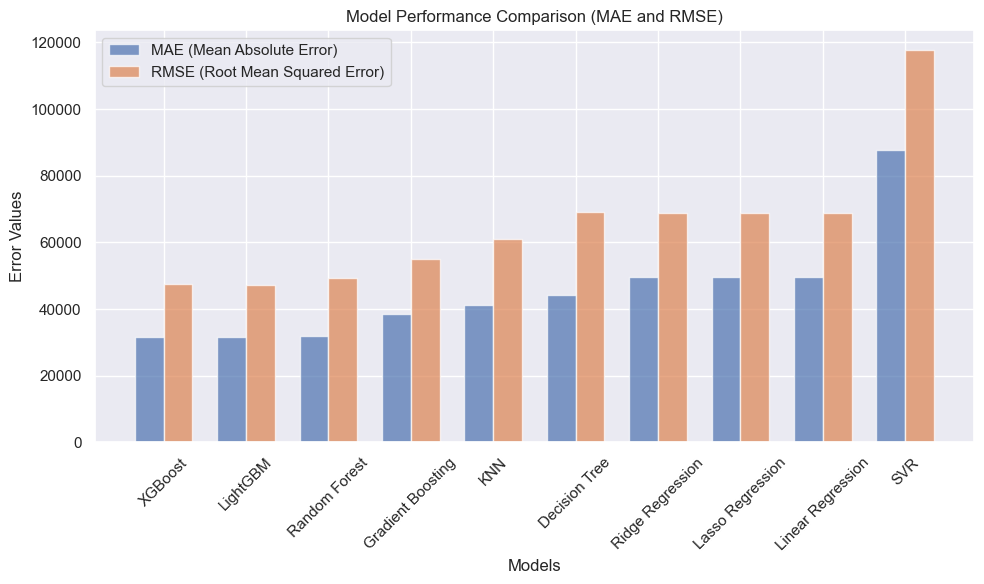

In [51]:
# Extracting data
models = results_df['Model']
mae_values = results_df['MAE (Mean Absolute Error)']
rmse_values = results_df['RMSE (Root Mean Squared Error)']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
x = np.arange(len(models))  # X-axis positions

# MAE Bars
ax.bar(x - bar_width/2, mae_values, bar_width, label='MAE (Mean Absolute Error)', alpha=0.7)

# RMSE Bars
ax.bar(x + bar_width/2, rmse_values, bar_width, label='RMSE (Root Mean Squared Error)', alpha=0.7)

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Model Performance Comparison (MAE and RMSE)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

I'm evaluating these models based on Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), along with their respective standard deviations. The top three models selected, based on their lower error metrics, are:
* **XGBoost:** Achieved the lowest MAE (31,525) and RMSE (47,499), indicating it is the most accurate and consistent model, with relatively low variability (MAE Std Dev: 947).
* **LightGBM:** Performed closely to XGBoost with a slightly higher MAE (31,717) and RMSE (47,338), maintaining a strong balance of accuracy and stability (MAE Std Dev: 877).
* **Random Forest:** Ranked third with a MAE of 32,052 and RMSE of 49,299, showing slightly higher variability (MAE Std Dev: 1,053).<br>

In [52]:
# Saving the data frame as pickle
house_data.to_pickle('house_data.pkl')

# **Performance Analysis**

In [3]:
# Reading the pickle file with the results of AutoML
autoML_performance_models = pd.read_pickle('automl_performance.pkl')
performance_manual_models = pd.read_pickle('performance_manual.pkl')

In [4]:
# Creating a data frame with both AutoML and manual models performance 
models_performance = pd.concat([autoML_performance_models, performance_manual_models], ignore_index=True)

In [6]:
performance_manual_models

,model_id,RMSE,MSE,MAE,R2
0,XGBoost,45937.933582,2.110294e+09,31481.250088,0.845684
1,LightGBM,43125.842838,1.859838e+09,29009.428930,0.863999
2,Random Forest,46461.541375,2.158675e+09,31559.310681,0.842147


In [5]:
models_performance

,model_id,RMSE,MSE,MAE,R2
0,AutoML_Baseline,45601.954957,2.079538e+09,29618.478240,0.845568
1,AutoML_Features,44418.700027,1.973021e+09,28874.351610,0.853478
2,AutoML_Capped,39158.806214,1.533412e+09,25830.410962,0.886125
3,XGBoost,45937.933582,2.110294e+09,31481.250088,0.845684
4,LightGBM,43125.842838,1.859838e+09,29009.428930,0.863999
5,Random Forest,46461.541375,2.158675e+09,31559.310681,0.842147


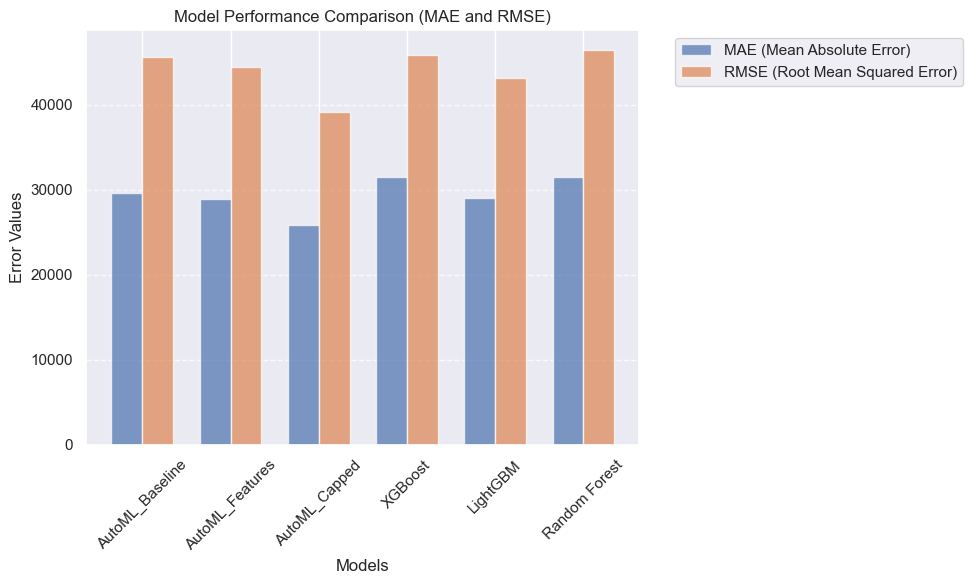

In [57]:
# Extracting data
models = models_performance['model_id']
mae_values = models_performance['MAE']
rmse_values = models_performance['RMSE']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
x = np.arange(len(models))  # X-axis positions

# MAE Bars
ax.bar(x - bar_width/2, mae_values, bar_width, label='MAE (Mean Absolute Error)', alpha=0.7)
# RMSE Bars
ax.bar(x + bar_width/2, rmse_values, bar_width, label='RMSE (Root Mean Squared Error)', alpha=0.7)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.8)

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Model Performance Comparison (MAE and RMSE)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))  # Position legend outside the plot

# Rotate x-axis labels
plt.xticks(rotation=45)


# Display the plot
plt.tight_layout()
plt.show()

- The AutoML_Capped model performs the best across all metrics, with the lowest RMSE (39,159) and the highest R² (0.8861).
This demonstrates that addressing the capped value issue and leveraging H2O's AutoML capabilities yielded excellent results.
- Among the manual models, LightGBM outperformed the others with an RMSE of 43,126 and R² of 0.864, showing strong generalization and accuracy. XGBoost closely followed but had slightly higher errors, while Random Forest lagged behind, showing the weakest performance.
- AutoML provided better overall performance, especially with feature engineering and capping adjustments, while manual models like LightGBM delivered strong results.

In [59]:
# Adding a column for RMSE-to-MAE ratio
models_performance['RMSE_to_MAE_Ratio'] = models_performance['RMSE'] / models_performance['MAE']

In [60]:
models_performance[['model_id', 'RMSE_to_MAE_Ratio']]

,model_id,RMSE_to_MAE_Ratio
0,AutoML_Baseline,1.539645
1,AutoML_Features,1.538345
2,AutoML_Capped,1.515996
3,XGBoost,1.459216
4,LightGBM,1.486615
5,Random Forest,1.472198


The ratios (ranging from 1.46 to 1.54) suggest that all models are moderately affected by larger errors, but these errors are not extreme. This is expected in house price prediction, where a few high-value properties often skew predictions. 

# **Final Conclusions:**

Despite the dataset's age, the exploration of long-term patterns, such as the influence of income, proximity to the coast, and population density on housing prices,remains highly relevant today. These models offer value as baselines for updating with modern data, testing assumptions about housing markets, and simulating economic scenarios. They also serve as effective tools for educating analysts and policymakers on housing dynamics.<br>

The AutoML_Capped model, with the lowest RMSE (39,159) and the highest R² (0.8861), is the model with the best result: 
- An R² of 0.8861 indicates that the model explains approximately 88.6% of the variance in housing prices. This high explanatory power reflects the model’s ability to capture key drivers of housing prices, making it a reliable tool for understanding historical market behavior.
- The RMSE of 39,159 suggests that, on average, the model's predictions deviate by about 39,159USD from actual housing prices. While this error margin may seem high in absolute terms, it is acceptable given the broad range of property values and the dataset's age.

This analysis identifies factors such as median_income as a highly influential variable, reinforcing the strong relationship between income levels and housing affordability. Higher income levels drive up property values, as wealthier buyers with greater purchasing power compete for limited housing stock. Location factors, such as proximity to the coast (ocean_proximity_INLAND), also play a crucial role. Coastal properties tend to have higher prices due to their desirability and scarcity, whereas inland areas generally see lower property values. Additionally, features like population density (population_per_household) and housing layout (rooms_per_capita) highlight how housing prices are shaped by supply-demand dynamics and the quality of living standards in different areas.

In this project, stacking methods were not applied for manual models to maintain simplicity and focus on individual model performance. Stacking, while often improving accuracy, introduces additional complexity and computational overhead, making it harder to isolate the strengths and weaknesses of individual algorithms. Moreover, the goal was to evaluate how well individual models could perform with targeted adjustments and feature engineering. By keeping the models separate, this analysis provided a clear and interpretable comparison between AutoML and manual approaches without the added layer of complexity that stacking introduces.